In [82]:
import numpy as np
import pylab as plt
from scipy import stats
%matplotlib inline

# Statistical Inference

Statistical inference is the process of drawing conclusions about populations or scientific truths from data.

## Part 1: Hypothesis Testing

### The Problem

A common goal in experiments is to learn something about a random variable. As you know, a random variable is a variable whose possible values are numerical outcomes of a random phenomenon. For example, say someone comes up to you and says, "You're tall!" But are you "tall"? How tall are you for man/woman of your ethnic background? Let's say we want to know about the distribution of heights of American women. 

A common strategy to learn something about average height is to take a sample from that random variable and try to **infer** something about the underlying distribution.

Let's say the true distribution of heights of American women is normal with mean 64 inches and standard deviation 2.4 inches:

In [52]:
mu, sigma = 64, 2.4 # mean and standard deviation in inches

### The T-test

Let's say we randomly choose 10 American women, and we measure their heights. We get the following values: 

In [53]:
sample = np.random.normal(mu, sigma, 10)
print(sample)

[ 62.61832367  63.57453415  66.82118346  63.80514634  64.53824096
  68.52297263  61.02315401  60.12299855  62.59935152  63.75100833]


It's easy to calculate the mean of these values:

In [54]:
sample.mean()

63.737691361773827

But with sampling, you're going to have fluctuations. How do we know whether this sample is "representative" of the underlying distribution, or an outlier that we only got by random chance? Well, ideally we would know something about the distribution of samples. Since we can simulate sampling, let's see what would happen if we kept on drawing samples and calculating their means.

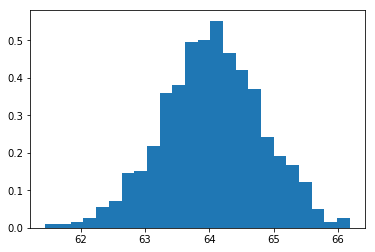

In [55]:
numIts = 1000
sample_size = 10
means = []
for iteration in range(numIts):
    sample = np.random.normal(mu, sigma, sample_size)
    means.append(sample.mean())

plt.hist(means, bins='auto', normed=True)
plt.show()

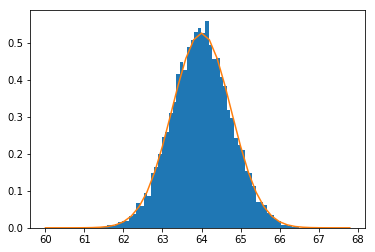

In [58]:
numIts = 10000
sample_size = 10
means = []
for iteration in range(numIts):
    sample = np.random.normal(mu, sigma, sample_size)
    means.append(sample.mean())

plt.hist(means, bins='auto', normed=True)

z = np.arange(60,68,.2)
plt.plot(z, stats.norm.pdf(z, mu, sigma/np.sqrt(sample_size)))
plt.show()

From this we can see that if we take a sample from a normally distributed population, subtract the population mean and divide by the population standard deviation (scaled by $\sqrt{n}$!), we get a normal distribution. We say that the **test statistic** $\frac{\bar{X} - \mu}{\sigma / \sqrt{n}}$ is normally distributed.

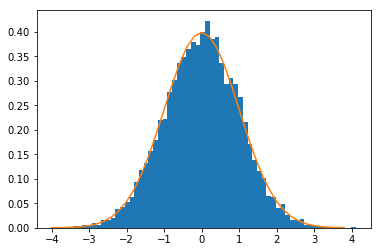

In [59]:
numIts = 10000
sample_size = 10
nstat = []
for iteration in range(numIts):
    sample = np.random.normal(mu, sigma, sample_size)
    nstat.append((sample.mean()-mu)/sigma*np.sqrt(sample_size))

plt.hist(nstat, bins='auto', normed=True)

z = np.arange(-4,4,.2)
plt.plot(z, stats.norm.pdf(z, 0, 1))
plt.show()

Ok, great. But say we can't take 10,000 samples, we can only take 1. Let's say we take one sample of $n = 10$ data points, and we get these values:

In [68]:
sample = np.array([65.19289312, 64.39203979, 64.24465191, 68.72814101, 64.63940843, 64.50023969, 61.64189186, 67.19334992, 68.48857214, 68.41098431])
print(sample)

[ 65.19289312  64.39203979  64.24465191  68.72814101  64.63940843
  64.50023969  61.64189186  67.19334992  68.48857214  68.41098431]


with this mean:

In [69]:
sample.mean()

65.743217217999998

Let's say we think that the population mean is 64. But this sample mean is greater than 64. Is this enough evidence to say that the population mean is not 64? We'd like a way to quantify this. We just learned that the test statistic $\frac{\bar{X} - \mu}{\sigma / \sqrt{n}}$ is normally distributed, so if we could calculate that quantity, we could use the normal distribution to calculate the probability of getting a sample mean of 65.74 or greater if the true mean is 64. That probability would be the **p-value**. However, calculating that test statistic requires that we know $\sigma$, the population standard deviation. But generally, we don't know it.

What do we do? Well, we have some other knowledge. It turns out that a different test statistic, $\frac{\bar{X} - \mu}{S / \sqrt{n}}$, where $S = \sqrt{\frac{1}{n-1} \sum{(X-\bar{X})^2}}$ is the **sample standard deviation** also has a known distribution. That would be the **t-distribution**.

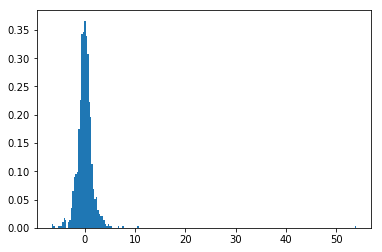

In [62]:
numIts = 1000
sample_size = 4
tstat = []
for iteration in range(numIts):
    sample = np.random.normal(mu, sigma, sample_size)
    tstat.append((sample.mean()-mu)/np.std(sample, ddof=1)*np.sqrt(sample_size))

plt.hist(tstat, bins='auto', normed=True)
plt.show()

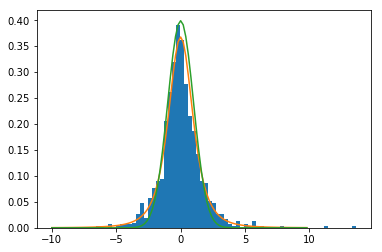

In [64]:
numIts = 1000
sample_size = 4

tstat = []
for iteration in range(numIts):
    sample = np.random.normal(mu, sigma, sample_size)
    tstat.append((sample.mean()-mu)/np.std(sample, ddof=1)*np.sqrt(sample_size))

plt.hist(tstat, bins='auto', normed=True)

z = np.arange(-10,10,.2)
plt.plot(z, stats.t.pdf(z, sample_size-1))
plt.plot(z, stats.norm.pdf(z, 0, 1)) # the normal, for comparison
plt.show()

The normal distribution and the t-distribution are similar, but the t-distribution has fatter tails. It is also goverened by a parameter, $\nu$. If you are using samples of size $n$ to estimate the population mean, the distribution of the test statistic $\frac{\bar{X} - \mu}{S / \sqrt{n}}$ follows a t-distribution with $\nu = n-1$. As $\nu \to \infty$, the t-distribution approaches a normal distribution, so a good rule of thumb for when to use the t-distribution is when $n < 20-50$.

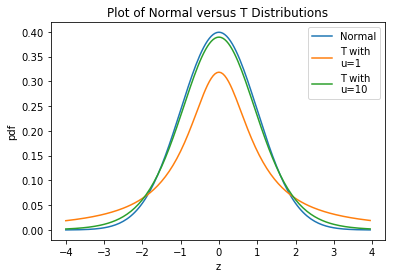

In [65]:
# Below we plot the normal and t distributions

z = np.arange(-4,4,.05)
plt.plot(z, stats.norm.pdf(z), label="Normal")
plt.plot(z, stats.t.pdf(z, 1), label="T with \nu=1")
plt.plot(z, stats.t.pdf(z, 10), label="T with \nu=10")
plt.xlabel("z")
plt.ylabel("pdf")
plt.title("Plot of Normal versus T Distributions")
plt.legend()
plt.show()

So the way we determine how good our evidence is that the population mean is not actually 64 is to calculate the probability of observing a sample mean of 65.74 or greater under the t-distribution with $\nu = 10-1 = 9$.

In [71]:
sample = np.array([65.19289312, 64.39203979, 64.24465191, 68.72814101, 64.63940843, 64.50023969, 61.64189186, 67.19334992, 68.48857214, 68.41098431])
print "P-Statistic for true mean", stats.ttest_1samp(sample, 64.)[1]

P-Statistic for true mean 0.0434764629991


We see that the number is pretty small, so this means that it's not very likely that we would randomly sample this random variable and get the sample we got if the population mean is 64. Out of 100 iterations, we'd get a test statistic this extreme or more extreme about 4 times. We might conclude that this is enough evidence to say that the true population mean is probably not 64.

For a two-sample t-test, which is the case you might see most often in practice, you calculate a slightly different statistic. Instead of the difference between the sample mean and your hypothesized mean, you would use the difference between the two sample means as the numerator, and test whether that is different from zero. In the denominator, you use slightly different expressions depending upon whether 1) the sample variances are assumed to be equal or 2) the sample variances are not assumed to be equal (which is called Welch's t-test).

### Relation to precision and recall

How do we decide whether this is enough evidence? Well we might set some rules, for example, we might say that if the p-value is less than 0.05, we're going to say that the true mean is not 64. What we're implicitly doing when we set that rule is saying that 5 times out of 100, we're going to say the true mean is not 64 or "reject the null hypothesis" even though it is true. So we're basically accepting a false positive (Type I) error rate of 5% for this test.

The false negative (Type II) error rate is $\beta$. $\beta$ = 1 - power. Power = Pr( Reject $H_0$ | $H_1$ is true), or the probability of correctly rejecting the null hypothesis. Intuitively, power increases the farther the true mean is from the hypothesized mean and as the sample size increases. 

### Recap: Assumptions of the t-test

Although the parent population does not need to be normally distributed, the distribution of the population of sample means, $\bar{x}$, is assumed to be normal. By the central limit theorem, if the sampling of the parent population is independent and the first moment of the parent population exists then the sample means will be approximately normally distributed.

An important assumption is that your sample observations are independent and identically distributed, and randomly drawn from the population you want to make inferences about.

## Part 2: Bayesian posterior inference

### Bayes' Rule

Recall the definition of conditional probability:

$$P(A \mid B) = \frac{P(B \cap A)}{P(B)}$$

This leads in a straightforward manner to Bayes' Rule:

$$P(A \mid B) = \frac{P(B \mid A) \, P(A)}{P(B)}  $$

We can re-interpret the events in Bayes' formula to allow us to make inferences about hypotheses. In this case, $P(A)$ is called the prior, our previous knowledge of the probability of $A$ happening. $P(B \mid A)$ is called the likelihood, or the likelihood of observing $B$ given $A$. $P(A \mid B)$, our quantity of interest, is the posterior, the likelihood of observing $A$ given $B$. $P(B)$ is the overall probability of observing $B$, which can usually be calculated by conditioning on $A$ and $A^C$ (**not** A). 

Here's an example: Let's say you have two coins in your pocket, a normal coin and a coin that has heads on both faces. You randomly draw a coin from your pocket and flip it 5 times. You get 5 heads. What's the probability that you drew the coin with two heads?

In [72]:
prior = 0.5

# The probability of flipping 5 heads if you get the two-headed coin is 1
p_5heads_biased_coin = 1.0

# The total probability of flipping 5 heads is the probability of flipping 5 heads with the two-headed coin
# plus the probability of flipping 5 heads with the ordinary coin 
p_5heads_ordinary_coin = (0.5)**5
p_5heads = prior*p_5heads_biased_coin + (1-prior)*p_5heads_ordinary_coin

# The final result:
posterior = 1*0.5/(0.5+0.5**6)
posterior = 32/33

### Inference for models

In general, we may have a model of a phenomenon and some knowledge of a parameter for that model, $\theta$. We would like to refine our model of $\theta$ by taking data, $x$. Using Bayes' theorem, we can update our knowledge of $\theta$ using $x$ as follows.

From Bayes' theorem, the posterior distribution is equal to the product of the likelihood function $\theta \mapsto p(x\mid \theta )$ and prior $p(\theta )$, normalized (divided) by the probability of the data $p(x)$:

$$p(\theta \mid x)={\frac {p(x\mid \theta )\,p(\theta )}{\int p(x\mid \theta ')\,p(\theta ')\,d\theta '}}$$

As an example, let's return to our previous problem of estimating the distribution of heights of American women. Let's say that based on some data we gathered previously, we think that the mean of the distribution is $\mu_0 = 64$ inches and the standard deviation is $\sigma_0 = 2.4$ inches. But then we take some new measurements, and we get the following sample:

In [73]:
sample = np.random.normal(66, 2.4, 10)
print(sample)
print('Sample mean: {0}'.format(sample.mean()))

[ 65.29665921  65.12876702  65.8136564   65.75963542  67.29749554
  70.0337861   66.80533465  65.07694206  64.91765149  62.83899696]
Sample mean: 65.8968924856


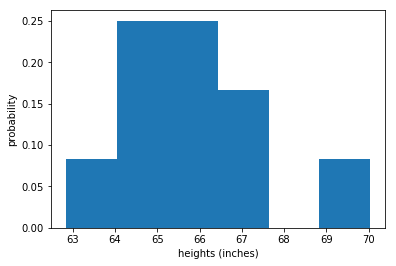

In [74]:
pyplot.hist(sample, bins='auto', normed=True)
pyplot.xlabel('heights (inches)')
pyplot.ylabel('probability')

How should we update our belief about the distribution of heights to reflect these gathered data?

### Analytical solution

In general, the posterior distribution can be hard to calculate, in particular when the integral in the denominator is hard to do. In some situations, the posterior distribution $p(\theta \mid x)$ is in the same functional family as the prior distribution, $p(\theta)$. In this case, the posterior and prior are called **conjugate distributions** and the prior is called a **conjugate prior** to the likelihood function $p(x \mid \theta)$. For example, for a normally-distributed likelihood function with known variance, the conjugate prior is also a normal distribution (so the posterior is also normally distributed). A list of other conjugate prior pairs can be found [here](https://en.wikipedia.org/wiki/Conjugate_prior).

For a normally-distributed likelihood function with standard deviation $\sigma$, and a normally-distributed prior with mean $\mu_0$ and standard deviation $\sigma_0$, the posterior distribution is a normal distribution with mean,

$$\frac{\frac{\mu_0}{\sigma_0^2} + \frac{\sum{x_i}}{\sigma^2}}{\frac{1}{\sigma_0^2}+\frac{n}{\sigma^2}}$$

and standard deviation,

$$\sqrt{\frac{1}{\frac{1}{\sigma_0^2} + \frac{n}{\sigma^2}}}$$

So let's calculate the posterior!

Posterior mean: 65.7244477142
Posterior standard deviation: 0.723627226987


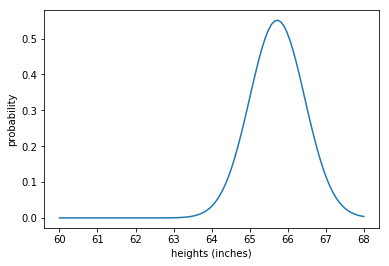

In [75]:
from scipy.stats import norm

def calc_posterior(data, x, mu_0, sigma_0):
    sigma = 2.4
    n = len(data)
    mu_post = (mu_0 / sigma_0**2 + data.sum() / sigma**2) / (1. / sigma_0**2 + n / sigma**2)
    sigma_post = np.sqrt((1. / sigma_0**2 + n / sigma**2)**-1)
    return norm(mu_post, sigma_post).pdf(x), mu_post, sigma_post

x = np.linspace(60, 68, 100)
posterior, posterior_mu, posterior_sigma = calc_posterior(sample, x, 64., 2.4)
plt.plot(x,posterior)
plt.xlabel('heights (inches)')
plt.ylabel('probability')
print('Posterior mean: {0}'.format(posterior_mu))
print('Posterior standard deviation: {0}'.format(posterior_sigma))

Intuitively, we can see that our new knowledge shifted our expectation about the prior from a mean at 64 to a mean closer to 66. 

### Simulated solution

Another possibility for generating a posterior distribution is via numerical approximation. In the following, we will generate a posterior distribution for heights using what is known as **Markov Chain Monte Carlo** or **MCMC** sampling. 

#### Markov Chain Monte Carlo (MCMC) sampling:

Our goal is to sample the posterior distribution without knowing it exactly. We want to generate a histogram that will approximate the distribution. Intuitively, we expect to generate more samples in regions where the distribution has larger values. 

We will be using one type of MCMC algorithm, the Metropolis algorithm. The Metropolis algorithm can draw samples from any probability distribution P(x), provided you can compute the value of a function $f(x)$ that is **proportional** to the density of $P(x)$. In our case, that would be the likelihood times the prior: $p(x\mid \theta )\,p(\theta )$.

The Metropolis algorithm works by generating a sequence of sample values in such a way that the histogram of values approximates the desired distribution, $P(\theta \mid x)$. These sample values are produced iteratively, with the distribution of the next sample being dependent only on the current sample value (thus making the sequence of samples into a Markov chain). 

Specifically, at each iteration, the algorithm picks a candidate for the next sample value based on the current sample value. Then, with some probability, the candidate is either accepted (in which case the candidate value is used in the next iteration) or rejected (in which case the candidate value is discarded, and current value is reused in the next iteration)−the probability of acceptance is determined by comparing $p(x \mid \theta_{current} )\,p(\theta_{current} )$ with $p(x \mid \theta_{candidate} )\,p(\theta_{candidate} )$.

##### Initialization:
1. Pick an arbitrary starting point $\theta_0$.
2. Choose an arbitrary probability density $g(\theta_{candidate} \mid \theta_{current})$ that suggests a candidate for the next sample value $\theta_{candidate}$ given a previous sample value $\theta_{current}$. $g(\theta_{candidate} \mid \theta_{current})$ must be symmetric. A usual choice is a Gaussian distribution centered at $\theta_{current}$. 

##### Iteration:
3. Given the previous sample value $\theta_{current}$, generate a candidate sample $\theta_{candidate}$. 
4. Calculate the acceptance ratio $\alpha = \frac{p(x \mid \theta_{candidate} )\,p(\theta_{candidate} )}{p(x \mid \theta_{current} )\,p(\theta_{current} )}$.
5. If $\alpha>1$, accept the move. The current sample then becomes $\theta_{candidate}$. If $\alpha<1$, accept the move with probability $\alpha$. If this move is accepted, the next step is $\theta_{candidate}$, otherwise the step is rejected and the next sample in the sequence is again $\theta_{current}$.
6. Repeat this process until you have collected a sufficient number of samples

Posterior average: 65.6479025955
Posterior standard deviation: 0.820106790909


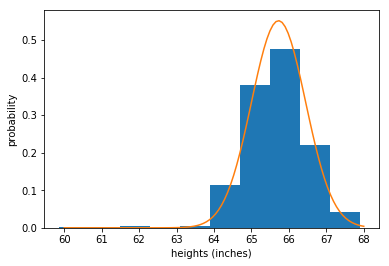

In [80]:
mu_prior_mu = 64
mu_prior_sd = 2.4
known_sd = 2.4

## SETUP STEPS:
# For our case, the variable x we are trying to determine is the mean
# of the distribution. We'll start by choosing some arbitrary mu.
mu_current = 60
# In order to choose a new point, we need to choose a sampling distribution.
# We'll choose a Gaussian centered on the current mu, with a variance of 1.
proposal_width = 1
# Initialize a list to save our points in.
all_samples = []

## ITERATIVE STEPS:
N_samples = 1000
for i in range(N_samples):
    # Choose a new potential mu.
    mu_proposal = norm(mu_current, proposal_width).rvs()

    # Calculate the likelihoods.
    likelihood_current = norm(mu_current, known_sd).pdf(sample).prod()
    likelihood_proposal = norm(mu_proposal, known_sd).pdf(sample).prod()
    # Calculate the prior probabilities.
    prior_current = norm(mu_prior_mu, mu_prior_sd).pdf(mu_current)
    prior_proposal = norm(mu_prior_mu, mu_prior_sd).pdf(mu_proposal)
    # Calculate the nominators of the posteriors.
    p_current = likelihood_current * prior_current
    p_proposal = likelihood_proposal * prior_proposal
    # Calculate the acceptance ratio:
    p_accept = p_proposal / p_current

    # Accept or reject the move:
    accept = np.random.rand() < p_accept
    if accept:
        mu_current = mu_proposal
    all_samples.append(mu_current)

## Plot and print the results
plt.hist(all_samples, normed=True)
plt.plot(x,posterior) # our analytically calculated posterior from above
plt.xlabel('heights (inches)')
plt.ylabel('probability')
posterior_mu = np.mean(all_samples)
posterior_sd = np.std(all_samples)
print('Posterior average: {0}'.format(posterior_mu))
print('Posterior standard deviation: {0}'.format(posterior_sd))

### Comparison

If the prior and likelihood are known for all hypotheses, then Bayes’ formula computes the posterior exactly. In most cases, the prior probabilities are not known. In this case, we must use statistical inference: we either make up a prior (Bayesian) or do our best using only the likelihood (hypothesis testing). Hypothesis testing only uses conditional distributions of data given specific hypotheses. The assumption is that some hypothesis (parameter specifying the conditional distribution of the data) is true and that the observed data is sampled from that distribution. In particular, hypothesis testing does not depend on estimating the prior.

Bayesian inference:
* uses probabilities for both hypotheses and data.
* depends on the prior and likelihood of observed data.
* requires one to know or construct a ‘subjective prior’.
* may be computationally intensive due to integration over many parameters.

Hypothesis testing:
* never uses or gives the probability of a hypothesis (no prior or posterior).
* depends on the likelihood $P(x | \theta)$.
* tends to be less computationally intensive.

*Copyright &copy; 2017 Elizabeth Otto Hamel.  All rights reserved.*